# Plot heritabilities

- Read heritabilities
- Plot heritabilities with bar

Last edit: Amelink, J.S, 2024-11-29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

workspace_path = "/data/workspaces/lag/workspaces/lg-ukbiobank/projects/FLICA_multimodal/"
cfs_path = "/data/clusterfs/lag/projects/lg-ukbiobank/working_data/imaging_data/FLICA_multimodal/"

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [30]:
def get_hers(base_fn, phenos):
    
    no_phenos = len(phenos)

        #Get data
    all_hers = pd.DataFrame(index=phenos, columns=["Vg", "Vg_SE", "Ve", "Ve_SE", "logL", "P"], dtype=np.float64)
    for i in range(no_phenos):
        data = pd.read_csv(base_fn.format(i+1), sep="\t", float_precision='high')
            
        all_hers.loc[phenos[i], "Vg"] = data["Variance"][0]
        all_hers.loc[phenos[i], "Vg_SE"] = data["SE"][0]
        all_hers.loc[phenos[i], "Ve"] = data["Variance"][1]
        all_hers.loc[phenos[i], "Ve_SE"] = data["SE"][1]
        all_hers.loc[phenos[i], "logL"] = data["Variance"][4]
        all_hers.loc[phenos[i], "P"] = data["Variance"][8]
    return all_hers

def plot_hers(df, fn=None, custom_labels=None):
    plt.figure(figsize=(4, 5))
    bars = plt.bar(x=df.index.values, height=df['Vg'], yerr=df['Vg_SE'], capsize=5)

    plt.xlabel('Phenotype')
    plt.ylabel('Heritability')
    plt.title('Heritability multimodal components')
              
    if custom_labels:
        plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right', fontsize=12)
    else:
        plt.xticks(rotation=90, fontsize=12)
    
    plt.tight_layout()
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)
    plt.show()
    
    if fn:
        plt.savefig(fn, dpi=300)

In [27]:
hers = get_hers(base_fn="/data/clusterfs/lag/users/jitame/FLICA/geno/gcta/flica_32k_new_{}.hsq",
                phenos=["5c_c4", "10c_c6", "10cR_c2"])

In [28]:
hers.head()

,Vg,Vg_SE,Ve,Ve_SE,logL,P
5c_c4,0.294293,0.013900,0.706096,0.013224,-16012.004,0.0
10c_c6,0.255415,0.013531,0.743949,0.013253,-16071.456,0.0
10cR_c2,0.255447,0.013532,0.744004,0.013254,-16072.871,0.0


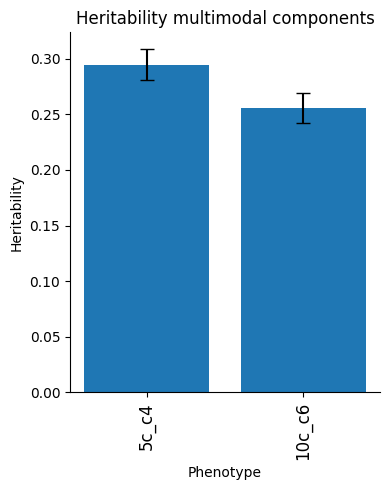

<Figure size 640x480 with 0 Axes>

In [33]:
plot_hers(hers.iloc[:2,:], fn="/data/workspaces/lag/workspaces/lg-ukbiobank/projects/FLICA_multimodal/results/her_bar.png")